In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Creating Dataframes by Loading CSV Files

In [16]:
df_0_shot = pd.read_csv('../results/humaneval_x_correct/humaneval_x_0_shot.csv')
df_3_shot = pd.read_csv('../results/humaneval_x_correct/humaneval_x_3_shot.csv')


/tmp/ipykernel_40326/1507033048.py:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_0_shot = pd.read_csv('../results/humaneval_x_correct/humaneval_x_0_shot.csv')


In [17]:
df_0_shot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32800 entries, 0 to 32799
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LLM                        32800 non-null  object 
 1   Benchmark prompt           32800 non-null  object 
 2   Execution time (s)         32800 non-null  object 
 3   CPU Energy (J)             32800 non-null  object 
 4   RAM Energy (J)             32800 non-null  object 
 5   GPU Energy (J)             32800 non-null  object 
 6   CPU Power (W)              32800 non-null  object 
 7   RAM Power (W)              32800 non-null  object 
 8   GPU Power (W)              32800 non-null  object 
 9   CO2 emissions (Kg)         32800 non-null  object 
 10  CO2 emissions rate (Kg/s)  32800 non-null  object 
 11  Pass@1                     32800 non-null  float64
 12  Pass@10                    32800 non-null  float64
 13  GoogleBLEU                 32800 non-null  flo

In [18]:
df_3_shot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30590 entries, 0 to 30589
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LLM                        30590 non-null  object 
 1   Benchmark prompt           30590 non-null  object 
 2   Execution time (s)         30590 non-null  object 
 3   CPU Energy (J)             30590 non-null  object 
 4   RAM Energy (J)             30590 non-null  object 
 5   GPU Energy (J)             30590 non-null  object 
 6   CPU Power (W)              30590 non-null  object 
 7   RAM Power (W)              30590 non-null  object 
 8   GPU Power (W)              30590 non-null  object 
 9   CO2 emissions (Kg)         30590 non-null  object 
 10  CO2 emissions rate (Kg/s)  30590 non-null  object 
 11  Pass@1                     30590 non-null  float64
 12  Pass@10                    30590 non-null  float64
 13  GoogleBLEU                 30590 non-null  flo

### Remove execution/lines with "ERROR"

In [19]:
# Remove rows where at least one column contains 'Error'
df_0_shot = df_0_shot[~df_0_shot.isin(['ERROR']).any(axis=1)]
df_3_shot = df_3_shot[~df_3_shot.isin(['ERROR']).any(axis=1)]


### Cast data types

In [20]:
# Converting 'LLM' and 'Benchmark prompt' to string
df_0_shot['LLM'] = df_0_shot['LLM'].astype(str)
df_0_shot['Benchmark prompt'] = df_0_shot['Benchmark prompt'].astype(str)

# Defining the columns to be converted to float
float_columns = [
    'Execution time (s)', 'CPU Energy (J)', 'RAM Energy (J)', 'GPU Energy (J)', 
    'CPU Power (W)', 'RAM Power (W)', 'GPU Power (W)', 
    'CO2 emissions (Kg)', 'CO2 emissions rate (Kg/s)'
]

# Converting the specified columns to float
df_0_shot[float_columns] = df_0_shot[float_columns].astype(float)
df_0_shot.info()

/tmp/ipykernel_40326/842181511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0_shot['LLM'] = df_0_shot['LLM'].astype(str)
/tmp/ipykernel_40326/842181511.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0_shot['Benchmark prompt'] = df_0_shot['Benchmark prompt'].astype(str)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 31881 entries, 0 to 32799
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LLM                        31881 non-null  object 
 1   Benchmark prompt           31881 non-null  object 
 2   Execution time (s)         31881 non-null  float64
 3   CPU Energy (J)             31881 non-null  float64
 4   RAM Energy (J)             31881 non-null  float64
 5   GPU Energy (J)             31881 non-null  float64
 6   CPU Power (W)              31881 non-null  float64
 7   RAM Power (W)              31881 non-null  float64
 8   GPU Power (W)              31881 non-null  float64
 9   CO2 emissions (Kg)         31881 non-null  float64
 10  CO2 emissions rate (Kg/s)  31881 non-null  float64
 11  Pass@1                     31881 non-null  float64
 12  Pass@10                    31881 non-null  float64
 13  GoogleBLEU                 31881 non-null  flo

/tmp/ipykernel_40326/842181511.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0_shot[float_columns] = df_0_shot[float_columns].astype(float)


In [21]:
# Converting 'LLM' and 'Benchmark prompt' to string
df_3_shot['LLM'] = df_3_shot['LLM'].astype(str)
df_3_shot['Benchmark prompt'] = df_3_shot['Benchmark prompt'].astype(str)

# Defining the columns to be converted to float
float_columns = [
    'Execution time (s)', 'CPU Energy (J)', 'RAM Energy (J)', 'GPU Energy (J)', 
    'CPU Power (W)', 'RAM Power (W)', 'GPU Power (W)', 
    'CO2 emissions (Kg)', 'CO2 emissions rate (Kg/s)'
]

# Converting the specified columns to float
df_3_shot[float_columns] = df_3_shot[float_columns].astype(float)
df_3_shot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29254 entries, 0 to 30589
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LLM                        29254 non-null  object 
 1   Benchmark prompt           29254 non-null  object 
 2   Execution time (s)         29254 non-null  float64
 3   CPU Energy (J)             29254 non-null  float64
 4   RAM Energy (J)             29254 non-null  float64
 5   GPU Energy (J)             29254 non-null  float64
 6   CPU Power (W)              29254 non-null  float64
 7   RAM Power (W)              29254 non-null  float64
 8   GPU Power (W)              29254 non-null  float64
 9   CO2 emissions (Kg)         29254 non-null  float64
 10  CO2 emissions rate (Kg/s)  29254 non-null  float64
 11  Pass@1                     29254 non-null  float64
 12  Pass@10                    29254 non-null  float64
 13  GoogleBLEU                 29254 non-null  flo

### Calculating mean values for HumanEval-X

In [25]:
# Extract keywords from "Benchmark prompt"
df_0_shot['Programming Language'] = df_0_shot['Benchmark prompt'].str.extract(r'([A-Za-z]+)')
df_3_shot['Programming Language'] = df_3_shot['Benchmark prompt'].str.extract(r'([A-Za-z]+)')

# Print unique programming languages
print(f"df_0_shot -> {df_0_shot['Programming Language'].dropna().unique()}")
print(f"df_3_shot -> {df_3_shot['Programming Language'].dropna().unique()}")

# Check if unique programming languages are the same
if set(df_0_shot['Programming Language'].dropna().unique()) == set(df_3_shot['Programming Language'].dropna().unique()):
    print("Same languages!")
else:
    print("[WARNING] At least 1 language is not present in both dataframes")


df_0_shot -> ['CPP' 'Go' 'Python' 'Java' 'JavaScript']
df_3_shot -> ['JavaScript' 'CPP' 'Java' 'Python' 'Go']
Same languages!


In [43]:
# Function to remove outliers using the IQR method
def remove_outliers(group):
    Q1 = group['CPU Energy (J)'].quantile(0.25)
    Q3 = group['CPU Energy (J)'].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return group[(group['CPU Energy (J)'] >= lower_bound) & (group['CPU Energy (J)'] <= upper_bound)]

# Applying the function to each group of LLM and Benchmark prompt
df_0_no_outliers = df_0_shot.groupby(['LLM', 'Benchmark prompt']).apply(remove_outliers).reset_index(drop=True)
df_3_no_outliers = df_3_shot.groupby(['LLM', 'Benchmark prompt']).apply(remove_outliers).reset_index(drop=True)

In [44]:
# Check how many prompt_id remains in each programming language after the outliers removal

print("----------------------- 0-shot -----------------------")
print(f"Java ->  {df_0_no_outliers[df_0_no_outliers['Programming Language'] == 'Java']['Benchmark prompt'].nunique()}")
print(f"C++ -> {df_0_no_outliers[df_0_no_outliers['Programming Language'] == 'CPP']['Benchmark prompt'].nunique()}")
print(f"JavaScript -> {df_0_no_outliers[df_0_no_outliers['Programming Language'] == 'JavaScript']['Benchmark prompt'].nunique()}")
print(f"Go -> {df_0_no_outliers[df_0_no_outliers['Programming Language'] == 'Go']['Benchmark prompt'].nunique()}")
print(f"Python -> {df_0_no_outliers[df_0_no_outliers['Programming Language'] == 'Python']['Benchmark prompt'].nunique()}")

print("----------------------- 3-shot -----------------------")
print(f"Java ->  {df_3_no_outliers[df_3_no_outliers['Programming Language'] == 'Java']['Benchmark prompt'].nunique()}")
print(f"C++ -> {df_3_no_outliers[df_3_no_outliers['Programming Language'] == 'CPP']['Benchmark prompt'].nunique()}")
print(f"JavaScript -> {df_3_no_outliers[df_3_no_outliers['Programming Language'] == 'JavaScript']['Benchmark prompt'].nunique()}")
print(f"Go -> {df_3_no_outliers[df_3_no_outliers['Programming Language'] == 'Go']['Benchmark prompt'].nunique()}")
print(f"Python -> {df_3_no_outliers[df_3_no_outliers['Programming Language'] == 'Python']['Benchmark prompt'].nunique()}")


----------------------- 0-shot -----------------------
Java ->  164
C++ -> 164
JavaScript -> 164
Go -> 164
Python -> 164
----------------------- 3-shot -----------------------
Java ->  161
C++ -> 161
JavaScript -> 161
Go -> 161
Python -> 161


### Create dataframes with all the average values

In [47]:
# List of columns to calculate the mean for
columns_to_average = ['CPU Energy (J)', 'Execution time (s)', 'Pass@1', 'Pass@10', 'CodeBLEU', 'SacreBLEU', 'GoogleBLEU']

# Grouping by LLM and Programming Language, and calculating the mean for the specified columns
df_0_averages = df_0_no_outliers.groupby(['LLM', 'Programming Language'])[columns_to_average].mean().reset_index()
df_3_averages = df_3_no_outliers.groupby(['LLM', 'Programming Language'])[columns_to_average].mean().reset_index()

df_0_averages

,LLM,Programming Language,CPU Energy (J),Execution time (s),Pass@1,Pass@10,CodeBLEU,SacreBLEU,GoogleBLEU
0,Meta-Llama-3-8B-Instruct-Q6_K,CPP,4693.721286,72.015208,0.026220,0.195122,0.256971,11.513539,0.123414
1,Meta-Llama-3-8B-Instruct-Q6_K,Go,4698.558512,71.839334,0.007317,0.048780,0.315362,8.651069,0.098010
2,Meta-Llama-3-8B-Instruct-Q6_K,JavaScript,3918.714984,60.042486,0.001220,0.012195,0.202326,7.137308,0.085230
3,Meta-Llama-3-8B-Instruct-Q6_K,Python,4876.478778,74.724717,0.482771,0.763510,0.287290,4.840605,0.056280
4,codegeex4-all-9b-Q6_K_L,CPP,6068.573732,93.225928,0.010976,0.085366,0.221068,9.751692,0.105386
5,codegeex4-all-9b-Q6_K_L,Go,2668.078154,40.819007,0.000610,0.004653,0.325416,19.865445,0.205870
6,codegeex4-all-9b-Q6_K_L,Java,2710.385556,41.234427,0.000000,0.000000,0.340050,23.430936,0.242605
7,codellama-7b-instruct.Q5_K_M,CPP,2452.298227,37.440473,0.050000,0.231707,0.152019,14.752886,0.139885
8,codellama-7b-instruct.Q5_K_M,Go,2937.288827,44.919817,0.000000,0.000000,0.165557,8.219403,0.090563
9,codellama-7b-instruct.Q5_K_M,Java,2537.154150,38.312115,0.082317,0.310976,0.264124,17.722200,0.179542


### [FIX] HumanEval-x graphs

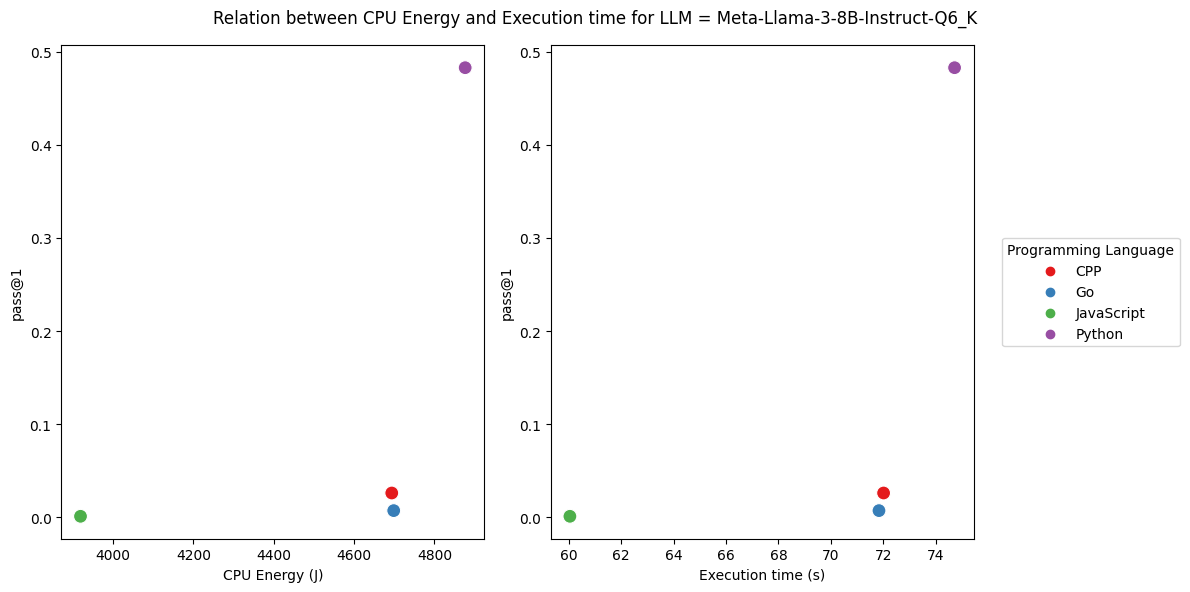

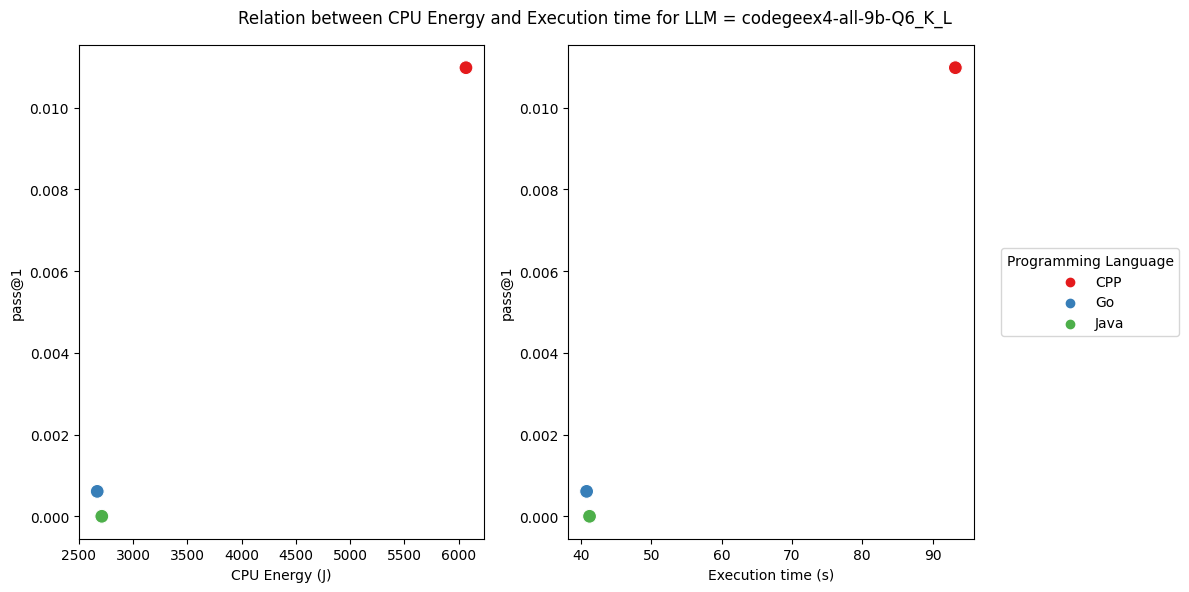

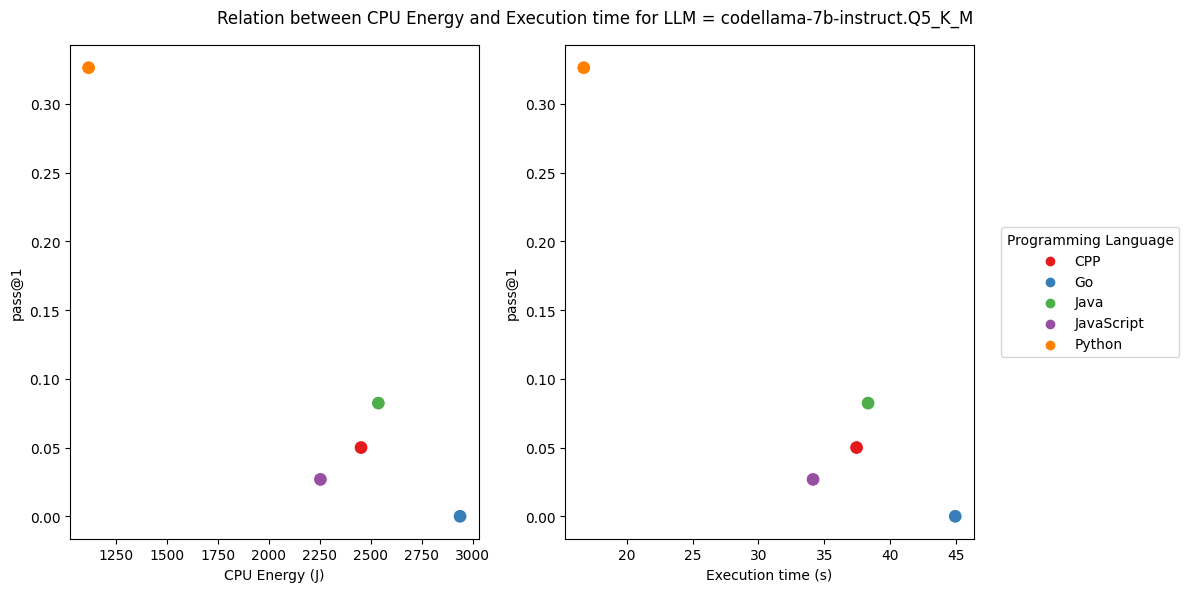

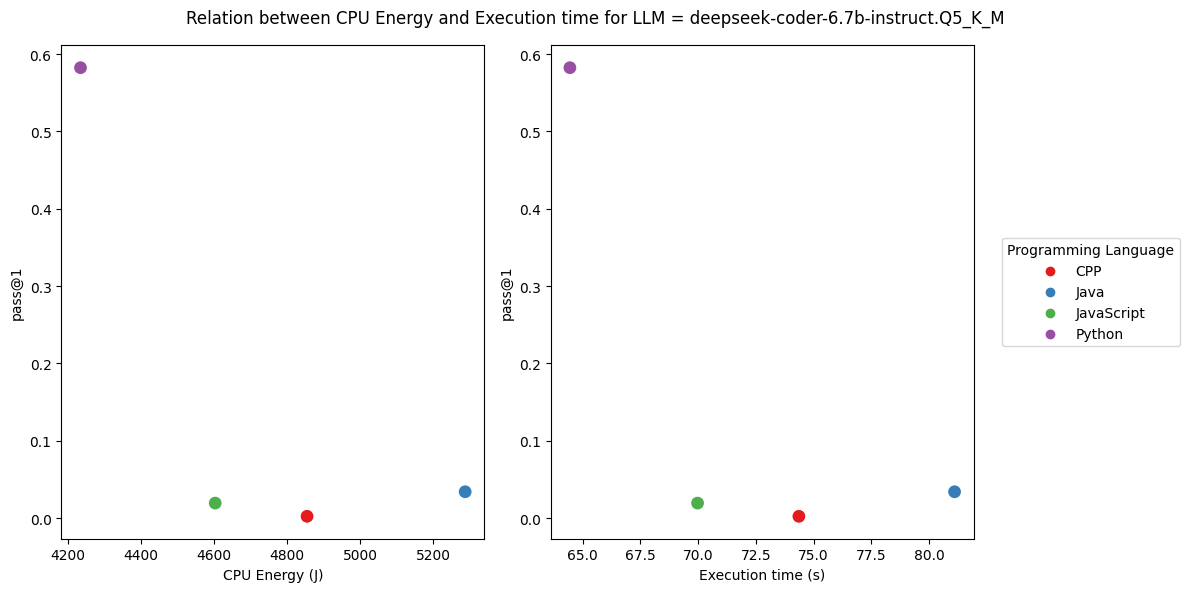

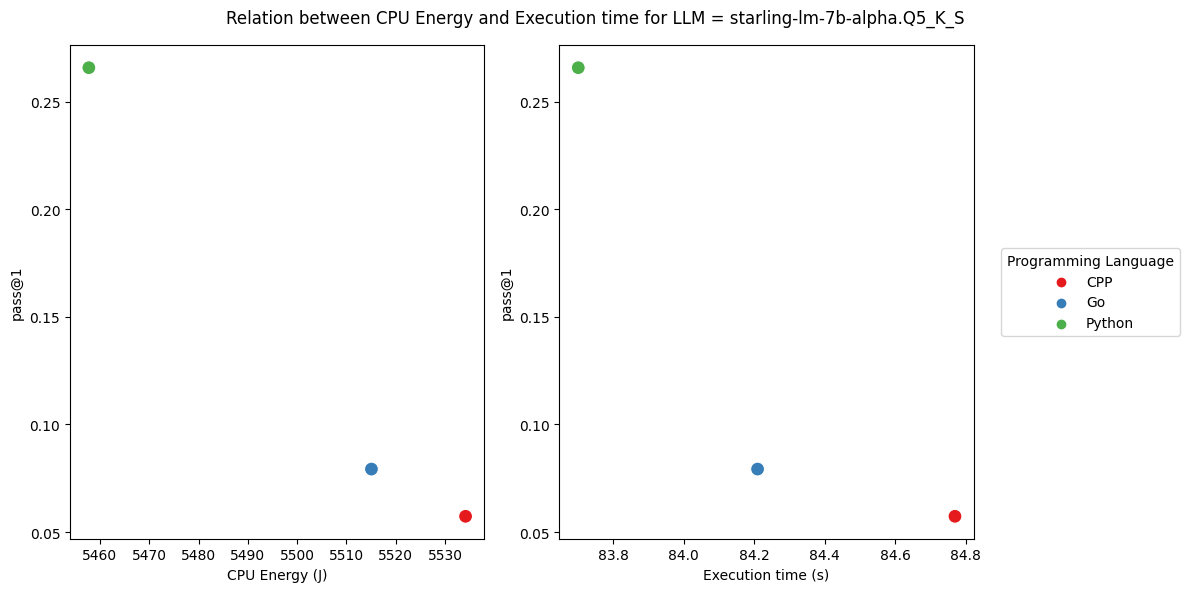

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get unique values of "LLM"
llm_values = df_0_averages['LLM'].unique()

# Iterar sobre os valores de "LLM" e criar um par de gráficos para cada
for llm_value in llm_values:
    # Filtrar DataFrame para o valor atual de "LLM"
    df_filtered = df_0_averages[df_0_averages['LLM'] == llm_value]
    
    # Criar figura com subplots para o par de gráficos
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    # Gráfico de Scatterplot para CPU Energy
    sns.scatterplot(data=df_filtered, x='CPU Energy (J)', y='Pass@1', hue='Programming Language', palette='Set1', s=100, legend=False, ax=axs[0])
    axs[0].set_xlabel('CPU Energy (J)')
    axs[0].set_ylabel('pass@1')
    
    # Gráfico de Scatterplot para Execution Time
    sns.scatterplot(data=df_filtered, x='Execution time (s)', y='Pass@1', hue='Programming Language', palette='Set1', s=100, ax=axs[1])
    axs[1].set_xlabel('Execution time (s)')
    axs[1].set_ylabel('pass@1')

    # Definir título da imagem
    fig.suptitle(f'Relation between CPU Energy and Execution time for LLM = {llm_value}')

    # Mover a legenda do primeiro gráfico para depois do segundo gráfico
    handles, labels = axs[1].get_legend_handles_labels()
    axs[1].legend(handles, labels, title='Programming Language', bbox_to_anchor=(1.05, 0.5), loc='center left')

    # Ajustar o layout para evitar sobreposição de títulos
    plt.tight_layout()

    # Mostrar a figura
    plt.show()


### [FIX] 0-shot vs N-shot prompting

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.text as mtext
import seaborn as sns

# Get unique values of "LLM"
llm_values = mean_cleaned_df_humaneval_x['LLM'].unique()

# Iterar sobre os valores de "LLM" e criar um par de gráficos para cada
for llm_value in llm_values:
    # Filtrar DataFrame para o valor atual de "LLM"
    df_filtered = mean_cleaned_df_humaneval_x[mean_cleaned_df_humaneval_x['LLM'] == llm_value]
    df_filtered_n = df_n_shot[df_n_shot['LLM'] == llm_value]  # Filtrar o segundo DataFrame
    
    # Criar figura com subplots para o par de gráficos
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    # Gráfico de Scatterplot para CPU Energy
    sns.scatterplot(data=df_filtered, x='CPU Energy (J)', y='HumanEval-X pass@1', hue='Programming Language', palette='Set1', legend=False,s=100, ax=axs[0])
    
    # Adicionar marcação para os pontos do segundo dataframe
    sns.scatterplot(data=df_filtered_n, x='CPU Energy (J)', y='HumanEval-X pass@1', hue='Programming Language', palette='Set1', legend=False,s=100, marker='x', ax=axs[0])
    
    axs[0].set_xlabel('CPU Energy (J)')
    axs[0].set_ylabel('pass@1')
    
    # Gráfico de Scatterplot para Execution Time
    sns.scatterplot(data=df_filtered, x='Execution time (s)', y='HumanEval-X pass@1', hue='Programming Language', palette='Set1', s=100, ax=axs[1])
    
    # Adicionar marcação para os pontos do segundo dataframe
    sns.scatterplot(data=df_filtered_n, x='Execution time (s)', y='HumanEval-X pass@1', hue='Programming Language', palette='Set1', s=100, marker='x', ax=axs[1])

    axs[1].set_xlabel('Execution time (s)')
    axs[1].set_ylabel('pass@1')

    # Definir título da imagem
    fig.suptitle(f'Relation between CPU Energy and Execution time for LLM = {llm_value}')

    # Mover a legenda do primeiro gráfico para depois do segundo gráfico
    handles, labels = axs[1].get_legend_handles_labels()
    
    class LegendTitle(object):
        def __init__(self, text_props=None):
            self.text_props = text_props or {}
            super(LegendTitle, self).__init__()

        def legend_artist(self, legend, orig_handle, fontsize, handlebox):
            x0, y0 = handlebox.xdescent, handlebox.ydescent
            title = mtext.Text(x0, y0, orig_handle,  **self.text_props)
            handlebox.add_artist(title)
            return title

    # Adicionando títulos personalizados à legenda
    legend = axs[1].legend(['0-shot prompting'] + handles[:5] + ['','N-shot prompting'] + handles[5:], 
                           [''] + labels[:5] + ['',''] + labels[5:],
                           handler_map={str: LegendTitle({'fontsize': 9})},
                           bbox_to_anchor=(1.05, 0.5), loc='center left', ncol=2)

    # Ajustar o layout para evitar sobreposição de títulos
    plt.tight_layout()

    # Mostrar a figura
    plt.show()


#### Energy

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Agrupar os dataframes por LLM
mean_cleaned_grouped = mean_cleaned_df_humaneval_x.groupby('LLM')
df_n_grouped = df_n_shot.groupby('LLM')

# Para cada grupo de LLM
for llm, mean_cleaned_group in mean_cleaned_grouped:
    df_n_group = df_n_grouped.get_group(llm)

    # Linguagens de programação
    languages = mean_cleaned_group['Programming Language'].unique()

    # Índices para as barras
    ind = np.arange(len(languages))

    # Altura das barras para mean_cleaned_df_humaneval_x e df_n_shot
    mean_cleaned_values = mean_cleaned_group.groupby('Programming Language')['CPU Energy (J)'].mean()
    df_n_values = df_n_group.groupby('Programming Language')['CPU Energy (J)'].mean()

    # Criar o gráfico de barras para o tempo de execução (CPU Energy)
    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(ind - width/2, mean_cleaned_values, width, color='lightcoral', label='0-shot prompting')
    rects2 = ax.bar(ind + width/2, df_n_values, width, color='lightgreen', label='N-shot prompting')

    # Adicionar rótulos, título e legendas
    ax.set_xlabel('Programming Language')
    ax.set_ylabel('CPU Energy (J)')
    ax.set_title(f'CPU Energy (J) comparison for LLM {llm}')
    ax.set_xticks(ind)
    ax.set_xticklabels(languages)

    # Rotacionar rótulos do eixo x
    plt.xticks(rotation=45)

    # Criar eixo yy (eixo y secundário) para os lineplots dos valores de "pass@1"
    ax2 = ax.twinx()  # Criar eixo y secundário
    color = 'tab:red'
    ax2.set_ylabel('Pass@1', color=color)
    ax2.plot(ind, mean_cleaned_pass_values, marker='s', color='red', linestyle='dashed', label='0-shot prompting')
    ax2.plot(ind, df_n_pass_values, marker='s', color='green', linestyle='dashed', label='N-shot prompting')
    ax2.tick_params(axis='y', labelcolor=color)

    # Mover legendas para fora do gráfico
    ax.legend(loc='upper left', bbox_to_anchor=(1.15, 0.5), title='CPU Energy (J)')
    ax2.legend(loc='upper left', bbox_to_anchor=(1.15, 0.7), title='Pass@1')

    # Ajustar layout
    plt.tight_layout()
    plt.show()


#### Time

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Agrupar os dataframes por LLM
mean_cleaned_grouped = mean_cleaned_df_humaneval_x.groupby('LLM')
df_n_grouped = df_n_shot.groupby('LLM')

# Para cada grupo de LLM
for llm, mean_cleaned_group in mean_cleaned_grouped:
    df_n_group = df_n_grouped.get_group(llm)

    # Linguagens de programação
    languages = mean_cleaned_group['Programming Language'].unique()

    # Índices para as barras
    ind = np.arange(len(languages))

    # Altura das barras para mean_cleaned_df_humaneval_x e df_n_shot
    mean_cleaned_values = mean_cleaned_group.groupby('Programming Language')['Execution time (s)'].mean()
    df_n_values = df_n_group.groupby('Programming Language')['Execution time (s)'].mean()

    # Criar o gráfico de barras para o tempo de execução (CPU Energy)
    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(ind - width/2, mean_cleaned_values, width, color='lightcoral', label='0-shot prompting')
    rects2 = ax.bar(ind + width/2, df_n_values, width, color='lightgreen', label='N-shot prompting')

    # Adicionar rótulos, título e legendas
    ax.set_xlabel('Programming Language')
    ax.set_ylabel('Execution time (s)')
    ax.set_title(f'Execution time (s) comparison for LLM {llm}')
    ax.set_xticks(ind)
    ax.set_xticklabels(languages)

    # Rotacionar rótulos do eixo x
    plt.xticks(rotation=45)

    # Criar eixo yy (eixo y secundário) para os lineplots dos valores de "pass@1"
    ax2 = ax.twinx()  # Criar eixo y secundário
    color = 'tab:red'
    ax2.set_ylabel('Pass@1', color=color)
    ax2.plot(ind, mean_cleaned_pass_values, marker='s', color='red', linestyle='dashed', label='0-shot prompting')
    ax2.plot(ind, df_n_pass_values, marker='s', color='green', linestyle='dashed', label='N-shot prompting')
    ax2.tick_params(axis='y', labelcolor=color)

    # Mover legendas para fora do gráfico
    ax.legend(loc='upper left', bbox_to_anchor=(1.15, 0.5), title='Execution time (s)')
    ax2.legend(loc='upper left', bbox_to_anchor=(1.15, 0.7), title='Pass@1')

    # Ajustar layout
    plt.tight_layout()
    plt.show()
